In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from utils import learning_curve_plotter, model_param_curve, score, metrics

In [2]:
# base param
seed = 712

In [3]:
# Load Dataset
credit_card_path = "./data/UCI_Credit_Card.csv"
df_credit = pd.read_csv(credit_card_path)

# EDA

- 샘플 사이즈
- 다양한 피쳐의 크기
- 클래스 비율
- 디스크릿, 컨티뉴어스 피쳐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

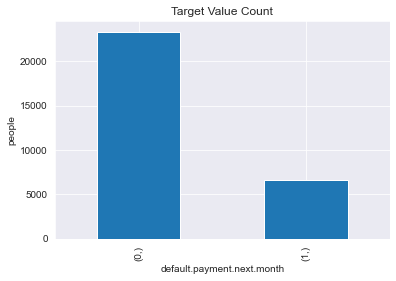

In [4]:
df_credit.head()
df_credit.info()

# visualize target value

target_cnt = df_credit[["default.payment.next.month"]].value_counts()

target_cnt.plot(kind='bar', title="Target Value Count")
plt.xlabel("default.payment.next.month")
plt.ylabel("people")
plt.grid()
plt.show()
# plt.savefig("target_value.png")
# plt.close()

# check null values
# df_credit.isnull().values.any()

In [5]:
edu_converter = (df_credit.EDUCATION == 5) | (df_credit.EDUCATION == 6) | (df_credit.EDUCATION == 0)
df_credit.loc[edu_converter, 'EDUCATION'] = 4

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


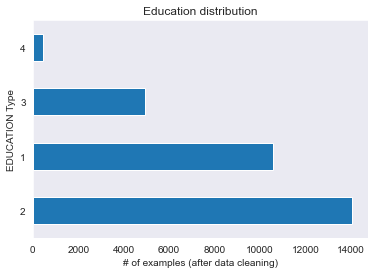

In [6]:
print(df_credit["EDUCATION"].value_counts())
df_credit["EDUCATION"].value_counts().plot(kind="barh", title="Education distribution")
plt.xlabel("# of examples (after data cleaning)")
plt.ylabel("EDUCATION Type")
plt.savefig("education_dist.png")

In [7]:
df_credit["MARRIAGE"] = df_credit["MARRIAGE"].replace(0, 3)

In [8]:
df_credit["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


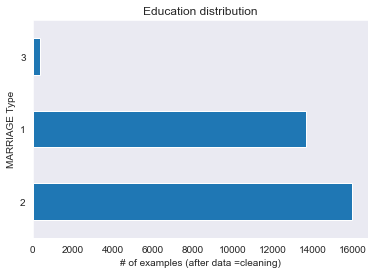

In [9]:
print(df_credit["MARRIAGE"].value_counts())
df_credit["MARRIAGE"].value_counts().plot(kind="barh", title="Education distribution")
plt.xlabel("# of examples (after data =cleaning)")
plt.ylabel("MARRIAGE Type")
plt.savefig("marriage_dist.png")

In [10]:
target = 'default.payment.next.month'
features = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

train_df, test_df = train_test_split(df_credit, test_size=0.2, random_state=712)
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# # data normalize 진행
# sc = StandardScaler()
# sc.fit(X_train_origin)

# X_train = sc.transform(X_train_origin)
# X_test = sc.transform(X_test_origin)

# for i in range(X_train.shape[1]):
#     print(f"Range after normalize feature {i}'s {min(X_train_origin[:, i])} ~ {max(X_train_origin[:, i])} to {min(X_train[:, i])} ~ {max(X_train[:, i])}")

# Decision Tree

In [ ]:
# Tree Pre-Pruning 작업 진행
# tree.export_text(tree_clf)
tree_clf = tree.DecisionTreeClassifier(random_state=seed)

params = {
    'max_depth': [2,4,8,16,32,64,128],
    'criterion': ['gini', 'entropy']
}

"""
that macro weighs each class equally whereas micro weights each sample equally. If the distribution of classes is symmetrical (i.e. you have an equal number of samples for each class), then macro and micro will result in the same score.
https://datascience.stackexchange.com/questions/45974/micro-f1-and-macro-f1-are-equal-in-binary-classification-and-i-dont-know-why
"""

tree_grid_search = GridSearchCV(estimator=tree_clf, param_grid=params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

In [20]:
entropy_std_train

0    0.000462
1    0.000479
2    0.000366
3    0.002331
4    0.001750
5    0.000126
6    0.000126
Name: std_train_score, dtype: float64

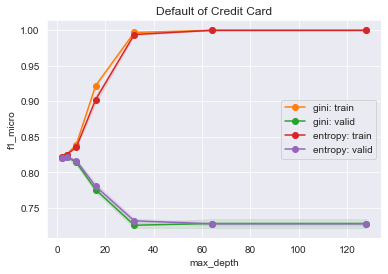

[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.822, test=0.820) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8;, score=(train=0.839, test=0.812) total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=32;, score=(train=0.994, test=0.729) total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=2;, score=(train=0.822, test=0.820) total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=4;, score=(train=0.826, test=0.821) total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=8;, score=(train=0.835, test=0.816) total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=64;, score=(train=1.000, test=0.729) total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=4;, score=(train=0.825, test=0.821) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16;, score=(train=0.921, test=0.780) total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=64;, score=(train=0.999, test=0.739) total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=8;

In [21]:
# grid_search.best_score_

tree_grid_search.cv_results_.keys()
tree_grid_search_result_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_grid_search_result_df.sort_values(by="rank_test_score")

gini_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('gini')]
entropy_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('entropy')]

x_range=params['max_depth']
x_label="max_depth"
y_label="f1_micro"
title="Default of Credit Card"

gini_mean_train = gini_df["mean_train_score"]
gini_std_train = gini_df["std_train_score"]

gini_mean_test = gini_df["mean_test_score"]
gini_std_test = gini_df["std_test_score"]

entropy_mean_train = entropy_df["mean_train_score"]
entropy_std_train = entropy_df["std_train_score"]

entropy_mean_test = entropy_df["mean_test_score"]
entropy_std_test = entropy_df["std_test_score"]

plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.plot(x_range, gini_mean_train, marker='o', label='gini: train', color=f"C{1}")
plt.fill_between(x_range, gini_mean_train+gini_std_train,
            gini_mean_train-gini_std_train, color=f'C{1}', alpha=0.1)
plt.plot(x_range, gini_mean_test, marker='o', label='gini: valid', color=f"C{2}")
plt.fill_between(x_range, gini_mean_test+gini_std_test,
         gini_mean_test-gini_std_test, color=f"C{2}", alpha=0.1)

plt.plot(x_range, entropy_mean_train, marker='o', label='entropy: train', color=f"C{3}")
plt.fill_between(x_range, entropy_mean_train+entropy_std_train,
            entropy_mean_train-entropy_std_train, color=f'C{3}', alpha=0.1)
plt.plot(x_range, entropy_mean_test, marker='o', label='entropy: valid', color=f"C{4}")
plt.fill_between(x_range, entropy_mean_test+entropy_std_test,
         entropy_mean_test-entropy_std_test, color=f"C{4}", alpha=0.1)

plt.legend()
plt.show()

In [22]:
# search for the best param
best_params = tree_grid_search_result_df["params"][np.argmax(tree_grid_search_result_df['mean_test_score'])]
best_score = np.max(tree_grid_search_result_df['mean_test_score'])

print(best_params, best_score)

# best parameter tester
best_tree_clf = tree.DecisionTreeClassifier(
    max_depth=4,
    random_state=seed,
    criterion='gini'
)

best_tree_clf.fit(X_train, y_train)

{'criterion': 'gini', 'max_depth': 4} 0.8219166666666666


DecisionTreeClassifier(max_depth=4, random_state=712)

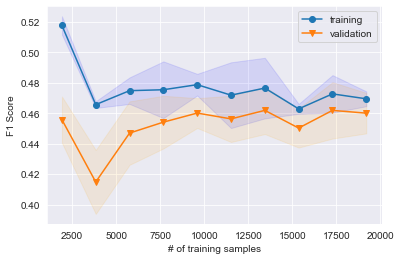

In [23]:
# Learning Curve Analysis

learning_curve_plotter(best_tree_clf, X_train, y_train)

In [24]:
# Test Set Performance
metrics(X_train, y_train, X_test, y_test, best_tree_clf)

train / test metrics - tr_roc: 0.6505092653868265, tr_f1: 0.4601951720595789, test_roc: 0.6329740158651811, test_f1: 0.42345614945511156


(0.6505092653868265,
 0.4601951720595789,
 0.6329740158651811,
 0.42345614945511156)

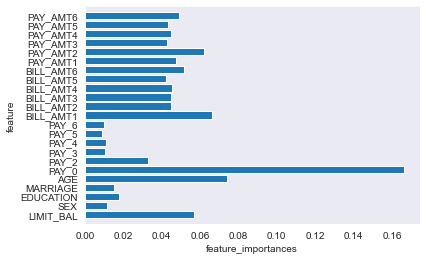

In [25]:
# feature importance

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features),
            model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features),
              features)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances(tree_clf)

# feature별 importance 매핑
# for name, value in zip(features , best_tree_clf.feature_importances_):
#     print('{} : {:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
# sns.barplot(x=best_tree_clf.feature_importances_ , y=y_train)

## Neural Network


In [11]:
nn_params = {
    "learning_rate_init": [0.1, 0.3, 0.5, 0.7, 1],
    "hidden_layer_sizes": [2, 5, 10, 30, 50, 100],
    "max_iter": [1, 5, 10, 20, 30, 40, 50]
}

nn_clf = MLPClassifier(random_state=seed)
nn_clf.fit(X_train, y_train)

nn_grid_search = GridSearchCV(estimator=nn_clf, param_grid=nn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
nn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/an

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/ana

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/ana

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

GridSearchCV(estimator=MLPClassifier(random_state=712), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [2, 5, 10, 30, 50, 100],
                         'learning_rate_init': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_iter': [1, 5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [12]:
nn_grid_search.cv_results_.keys()
nn_grid_search_df = pd.DataFrame(nn_grid_search.cv_results_)
nn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
172,2.366373,0.562034,0.010609,0.004159,50,1,30,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779583,0.779583,...,0.779625,0.000083,1,0.779635,0.779635,0.779583,0.779635,0.779583,0.779615,0.000026
168,0.104472,0.007955,0.008615,0.001235,50,1,1,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779583,0.779583,...,0.779625,0.000083,1,0.779635,0.779635,0.779583,0.779635,0.779583,0.779615,0.000026
169,0.487264,0.037338,0.010325,0.001118,50,1,5,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779583,0.779583,...,0.779625,0.000083,1,0.779583,0.779583,0.779583,0.779635,0.779583,0.779594,0.000021
170,0.929341,0.031060,0.008789,0.001301,50,1,10,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779583,0.779583,...,0.779625,0.000083,1,0.779583,0.779583,0.779583,0.779635,0.779583,0.779594,0.000021
171,1.697379,0.165027,0.009662,0.001218,50,1,20,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779583,0.779583,...,0.779625,0.000083,1,0.779583,0.779583,0.779583,0.779635,0.779583,0.779594,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.593727,0.031150,0.013417,0.001977,100,0.1,5,"{'hidden_layer_sizes': 100, 'learning_rate_ini...",0.779583,0.779583,...,0.774875,0.008899,206,0.779792,0.779635,0.779740,0.755469,0.779167,0.774760,0.009648
140,0.094397,0.004691,0.008751,0.001053,50,0.1,1,"{'hidden_layer_sizes': 50, 'learning_rate_init...",0.779375,0.779375,...,0.773583,0.011272,207,0.779635,0.779635,0.779427,0.779531,0.754687,0.774583,0.009948
106,0.369024,0.006921,0.008406,0.002640,30,0.1,5,"{'hidden_layer_sizes': 30, 'learning_rate_init...",0.779375,0.779583,...,0.769875,0.009097,208,0.779635,0.779583,0.755104,0.758490,0.772813,0.769125,0.010422
175,0.126663,0.009672,0.012857,0.002198,100,0.1,1,"{'hidden_layer_sizes': 100, 'learning_rate_ini...",0.772292,0.779375,...,0.703500,0.087725,209,0.770521,0.779583,0.666406,0.751354,0.558490,0.705271,0.083617


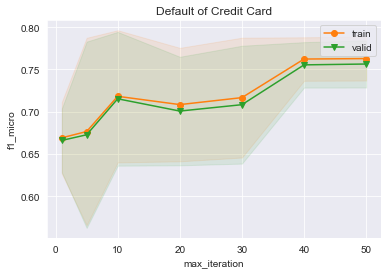

[CV 1/5] END ...max_iter=10;, score=(train=0.770, test=0.765) total time=   1.2s
[CV 4/5] END ...max_iter=30;, score=(train=0.783, test=0.778) total time=   3.9s
[CV 2/5] END ...max_iter=10;, score=(train=0.577, test=0.570) total time=   1.3s
[CV 5/5] END ...max_iter=30;, score=(train=0.778, test=0.765) total time=   4.4s
[CV 2/5] END ....max_iter=1;, score=(train=0.710, test=0.698) total time=   0.1s
[CV 1/5] END ...max_iter=20;, score=(train=0.752, test=0.747) total time=   2.7s
[CV 3/5] END ...max_iter=40;, score=(train=0.719, test=0.709) total time=   3.2s
[CV 5/5] END ....max_iter=1;, score=(train=0.625, test=0.630) total time=   0.1s
[CV 2/5] END ...max_iter=20;, score=(train=0.688, test=0.676) total time=   2.8s
[CV 4/5] END ...max_iter=40;, score=(train=0.783, test=0.778) total time=   3.8s
[CV 3/5] END ....max_iter=1;, score=(train=0.728, test=0.721) total time=   0.1s
[CV 5/5] END ...max_iter=10;, score=(train=0.690, test=0.692) total time=   1.3s
[CV 2/5] END ...max_iter=40;

In [52]:
# draw hyperparam tunning

# model_param_curve(nn_grid_search_df, "learning_rate_init", nn_params, "learning_rate_init", "nn_lr.png")
# model_param_curve(nn_grid_search_df, "L2 penalty(alpha)", nn_params, "alpha", "nn_l2.png")
# model_param_curve(nn_grid_search_df, "hidden layer size", nn_params, "hidden_layer_sizes", "nn_hidden.png")
model_param_curve(nn_grid_search_df, "max_iteration", nn_params, "max_iter", "nn_max_iter.png")

In [17]:
# search for the best param
best_params = nn_grid_search_df["params"][np.argmax(nn_grid_search_df['mean_test_score'])]
best_score = np.max(nn_grid_search_df['mean_test_score'])

# print(best_params, best_score)

{'hidden_layer_sizes': 50, 'learning_rate_init': 0.7, 'max_iter': 5} 0.779625


In [26]:
# # best parameter tester
best_nn_clf = MLPClassifier(
    random_state=seed,
    hidden_layer_sizes=30,
    learning_rate_init=0.7,
    max_iter=50
)

best_nn_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=30, learning_rate_init=0.7, max_iter=50,
              random_state=712)

In [19]:
# Learning Curve Analysis

learning_curve_plotter(best_nn_clf, X_train, y_train, save_name="lr_svm_credit.png")

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anac

In [27]:
metrics(X_train, y_train, X_test, y_test, best_nn_clf)

train / test metrics - tr_roc: 0.5000945179584121, tr_f1: 0.00037800037800037804, test_roc: 0.50037147102526, test_f1: 0.0014847809948032665


(0.5000945179584121,
 0.00037800037800037804,
 0.50037147102526,
 0.0014847809948032665)

## Boosting


In [17]:
boosting_params = {
    "n_estimators":[1, 2, 3, 5, 10, 20, 30, 50, 100]
}

ada_clf = AdaBoostClassifier(random_state=seed)

ada_grid_search = GridSearchCV(estimator=ada_clf, param_grid=boosting_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(random_state=712), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 3, 5, 10, 20, 30, 50, 100]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [18]:
ada_grid_search.cv_results_.keys()
ada_grid_search_result_df = pd.DataFrame(ada_grid_search.cv_results_)
ada_grid_search_result_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118662,0.003064,0.009629,0.006355,1,{'n_estimators': 1},0.819583,0.818750,0.819375,0.826875,...,0.821000,0.002985,1,0.821354,0.821562,0.821406,0.819531,0.821146,0.821000,0.000746
1,0.218697,0.010711,0.027920,0.013459,2,{'n_estimators': 2},0.819583,0.818750,0.819375,0.826875,...,0.821000,0.002985,1,0.821354,0.821562,0.821406,0.819531,0.821146,0.821000,0.000746
2,0.313846,0.010249,0.028878,0.008393,3,{'n_estimators': 3},0.819583,0.818750,0.819375,0.826875,...,0.821000,0.002985,1,0.821354,0.821562,0.821406,0.819531,0.821146,0.821000,0.000746
3,0.445548,0.008599,0.026449,0.011850,5,{'n_estimators': 5},0.819792,0.810833,0.817500,0.826042,...,0.818917,0.004922,4,0.819583,0.816510,0.819740,0.819479,0.821146,0.819292,0.001516
7,3.970949,0.081460,0.127682,0.011215,50,{'n_estimators': 50},0.819375,0.814583,0.820208,0.818333,...,0.818375,0.001987,5,0.821719,0.819844,0.819479,0.819896,0.819375,0.820062,0.000852
8,6.626333,0.195421,0.204685,0.009690,100,{'n_estimators': 100},0.817500,0.818333,0.816875,0.819167,...,0.818250,0.000956,6,0.822240,0.821094,0.821406,0.820104,0.820573,0.821083,0.000729
6,2.517944,0.013413,0.088802,0.010135,30,{'n_estimators': 30},0.818958,0.813125,0.821250,0.817292,...,0.817875,0.002692,7,0.819115,0.819635,0.818906,0.819479,0.818594,0.819146,0.000378
5,1.671675,0.024825,0.073509,0.020661,20,{'n_estimators': 20},0.817708,0.813958,0.818542,0.820417,...,0.817750,0.002110,8,0.818594,0.818854,0.819115,0.818698,0.818958,0.818844,0.000185
4,0.830978,0.014604,0.029672,0.006758,10,{'n_estimators': 10},0.821250,0.812500,0.817500,0.818125,...,0.817000,0.002889,9,0.819479,0.817969,0.819635,0.818281,0.817760,0.818625,0.000781


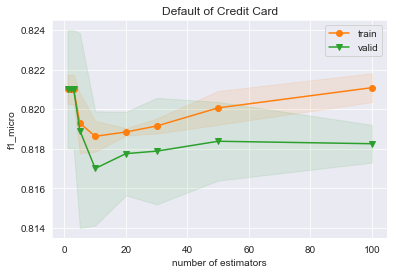

In [19]:
# draw hyperparam tunning

model_param_curve(ada_grid_search_result_df, "number of estimators", boosting_params, "n_estimators", "boost_estimators.png")

In [20]:
best_params = ada_grid_search_result_df["params"][np.argmax(ada_grid_search_result_df['mean_test_score'])]
best_score = np.max(ada_grid_search_result_df['mean_test_score'])

print(best_params)

# param_list = [i for i in ada_grid_search_result_df.keys() if i.startswith("param_")]
# new_df = pd.DataFrame(ada_grid_search_result_df, columns=[i for i in ada_grid_search_result_df.keys() if i != 'params'])
# new_df2 = new_df.set_index(param_list)
# new_df3 = new_df2.drop(axis=1, labels=[i for i in new_d
# f2.columns if i.startswith("split")])

{'n_estimators': 1}


In [21]:
# # best parameter tester

best_ada_clf = AdaBoostClassifier(
    random_state=seed,
    n_estimators=1
)

best_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1, random_state=712)

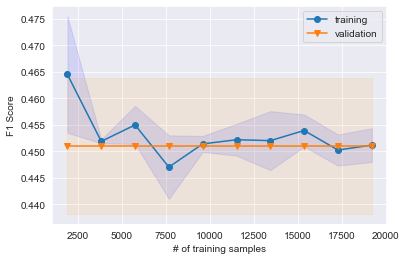

In [22]:
# Learning Curve Analysis

learning_curve_plotter(best_ada_clf, X_train, y_train)

In [23]:
metrics(X_train, y_train, X_test, y_test, best_ada_clf)

train / test metrics - tr_roc: 0.6462880357743652, tr_f1: 0.45120081757792546, test_roc: 0.6332289532211502, test_f1: 0.4241486068111455


(0.6462880357743652,
 0.45120081757792546,
 0.6332289532211502,
 0.4241486068111455)

In [26]:
# grad_clf = GradientBoostingClassifier(
#     learning_rate=0.1,
#     n_estimators=1000,
#     max_depth = 3, # no more than 5 usually
#     max_features=0.6,
#     subsample=0.7,
#     random_state=seed
# )
# grad_clf.fit(X_train, y_train)

# score(X_train, y_train, X_test, y_test, grad_clf)
# metrics(y_test, grad_clf.predict(X_test))

GradientBoostingClassifier(max_features=0.6, n_estimators=1000,
                           random_state=712, subsample=0.7)

## SVM

In [14]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# kernels = ["linear", "rbf"]
# C = [0.1,1,100,1000]

# tr_scores = np.zeros((len(C), len(kernels)))
# test_scores = np.zeros((len(C), len(kernels)))

# for i in range(len(C)):
#     for j in range(len(kernels)):
#         svm_clf = svm.SVC(C=C[i], kernel=kernels[j], random_state=seed, verbose=True)
#         svm_clf.fit(X_train, y_train)
#         tr_roc, tr_f1, test_roc, test_f1 = metrics(X_train, y_train, X_test, y_test, svm_clf)
#         tr_scores[i,j] = tr_f1
#         test_scores[i,j] = test_f1
#         print(f"tr_f1: {tr_f1}, test_f1: {test_f1}, C: {C[i]}, kernel: {kernels[j]}")

In [15]:
svm_params = {
    "kernel":["linear", "rbf"],
    "C": [0.1,1,100,1000]
}

svm_clf = svm.SVC(random_state=seed, verbose=True)

svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
svm_grid_search.cv_results_.keys()
svm_grid_search_df = pd.DataFrame(svm_grid_search.cv_results_)
svm_grid_search_df.sort_values(by="rank_test_score")

In [ ]:
linear_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('linear')]
poly_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('poly')]
rbf_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('rbf')]

In [ ]:
def model_param_curve_multi(grid_search_result_df, x_label, params, param_name, save_fig_name):

    x_range=params[param_name]
    x_label=x_label
    y_label="f1_micro"
    title="Default of Credit Card"
        
    linear_df = grid_search_result_df[svm_grid_search_df['param_kernel'].str.contains('linear')]
    rbf_df = grid_search_result_df[svm_grid_search_df['param_kernel'].str.contains('rbf')]

    linear_mean_train = linear_df["mean_train_score"]
    linear_mean_test = linear_df["mean_test_score"]
    linear_std_train = linear_df["std_train_score"]
    linear_std_test = linear_df["std_test_score"]
    
    rbf_mean_train = rbf_df["mean_train_score"]
    rbf_mean_test = rbf_df["mean_test_score"]
    rbf_std_train = rbf_df["std_train_score"]
    rbf_std_test = rbf_df["std_test_score"]

    #Plotting
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.plot(x_range, linear_mean_train, marker='o', label='linear train', color=f"C{1}")
    plt.fill_between(x_range, linear_mean_train+linear_std_train,
            linear_mean_train-linear_std_train, color=f'C{1}', alpha=0.1)
    plt.plot(x_range, linear_mean_test, marker='o', label='linear valid', color=f"C{2}")
    plt.fill_between(x_range, linear_mean_test+linear_std_test,
             linear_mean_test-linear_std_test, color=f"C{2}", alpha=0.1)
    plt.plot(x_range, rbf_mean_train, marker='v', label='rbf train', color=f"C{3}")
    plt.fill_between(x_range, rbf_mean_train+rbf_std_train,
             rbf_mean_train-rbf_std_train, color=f"C{3}", alpha=0.1)
    plt.plot(x_range, rbf_mean_test, marker='v', label='rbf valid', color=f"C{4}")
    plt.fill_between(x_range, rbf_mean_test+rbf_std_test,
             rbf_mean_test-rbf_std_test, color=f"C{4}", alpha=0.1)

    plt.legend()
    plt.savefig(save_fig_name)
    plt.show()

In [ ]:
# draw hyperparam tunning

model_param_curve_multi(svm_grid_search_df, "C value", svm_params, "C", "svm_c.png")

In [ ]:
best_params = svm_grid_search_df["params"][np.argmax(svm_grid_search_df['mean_test_score'])]
best_score = np.max(svm_grid_search_df['mean_test_score'])

print(best_params)

In [ ]:
# # best parameter tester

best_svm_clf = svm.SVC(
    random_state=seed
)

best_svm_clf.fit(X_train, y_train)

In [ ]:
# Learning Curve Analysis

learning_curve_plotter(best_svm_clf, X_train, y_train)

In [ ]:
metrics(X_train, y_train, X_test, y_test, best_svm_clf)

## K-NN

In [15]:
knn_params = {
    "n_neighbors": [1, 2, 3, 5, 10, 30, 50]
}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 30, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [23]:
# https://idkim97.github.io/machine%20learning/MachineLearning_SVM/
knn_grid_search.cv_results_.keys()
knn_grid_search_df = pd.DataFrame(knn_grid_search.cv_results_)
knn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.013977,0.004251,6.764649,0.367955,30,{'n_neighbors': 30},0.776667,0.781250,0.777292,0.778542,...,0.779375,0.002447,1,0.787031,0.785417,0.785625,0.786042,0.784583,0.785740,0.000802
6,0.011154,0.000967,6.920727,0.137882,50,{'n_neighbors': 50},0.778542,0.781458,0.777083,0.778750,...,0.779167,0.001473,2,0.784010,0.782448,0.783229,0.784010,0.783490,0.783438,0.000580
4,0.036433,0.018769,7.184234,0.367155,10,{'n_neighbors': 10},0.772708,0.779167,0.775417,0.776875,...,0.775750,0.002175,3,0.796458,0.795365,0.796615,0.796406,0.793802,0.795729,0.001060
1,0.035941,0.006845,7.107908,0.030934,2,{'n_neighbors': 2},0.765833,0.761667,0.767917,0.762292,...,0.765000,0.002565,4,0.844323,0.844635,0.844271,0.842865,0.844115,0.844042,0.000612
3,0.021565,0.009101,7.191273,0.066961,5,{'n_neighbors': 5},0.750417,0.756667,0.753333,0.752500,...,0.754292,0.002927,5,0.817187,0.815937,0.817813,0.819010,0.816406,0.817271,0.001082
2,0.026931,0.014039,7.087143,0.475528,3,{'n_neighbors': 3},0.733125,0.733958,0.742500,0.737083,...,0.736417,0.003327,6,0.847187,0.845573,0.841979,0.842135,0.843802,0.844135,0.002007
0,0.023318,0.004456,6.725616,0.033795,1,{'n_neighbors': 1},0.702500,0.694583,0.697708,0.695625,...,0.697500,0.002729,7,0.999583,0.999323,0.999427,0.999635,0.999427,0.999479,0.000114


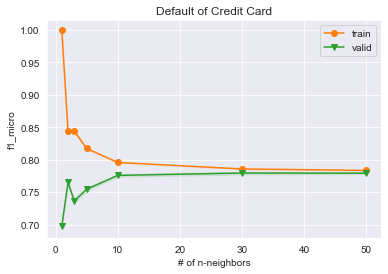

In [24]:
# draw hyperparam tunning
model_param_curve(knn_grid_search_df, "# of n-neighbors", knn_params, "n_neighbors", "knn_n_neighbors.png")

In [25]:
# params
best_params = knn_grid_search_df["params"][np.argmax(knn_grid_search_df['mean_test_score'])]
best_score = np.max(knn_grid_search_df['mean_test_score'])
print(best_params)

{'n_neighbors': 30}


In [26]:
# best parameter tester

best_knn_clf = KNeighborsClassifier(
    n_neighbors=30
)

best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

[CV 1/5] END .n_neighbors=2;, score=(train=0.844, test=0.766) total time=   7.2s
[CV 5/5] END .n_neighbors=5;, score=(train=0.816, test=0.759) total time=   7.2s
[CV 2/5] END .n_neighbors=1;, score=(train=0.999, test=0.695) total time=   6.8s
[CV 3/5] END .n_neighbors=3;, score=(train=0.842, test=0.743) total time=   6.3s
[CV 5/5] END n_neighbors=10;, score=(train=0.794, test=0.775) total time=   7.8s
[CV 4/5] END .n_neighbors=1;, score=(train=1.000, test=0.696) total time=   6.7s
[CV 1/5] END .n_neighbors=5;, score=(train=0.817, test=0.750) total time=   7.1s
[CV 3/5] END n_neighbors=30;, score=(train=0.786, test=0.777) total time=   6.4s
[CV 1/5] END .n_neighbors=1;, score=(train=1.000, test=0.703) total time=   6.8s
[CV 4/5] END .n_neighbors=3;, score=(train=0.842, test=0.737) total time=   7.2s
[CV 2/5] END n_neighbors=30;, score=(train=0.785, test=0.781) total time=   6.5s
[CV 3/5] END .n_neighbors=1;, score=(train=0.999, test=0.698) total time=   6.7s
[CV 5/5] END .n_neighbors=3;

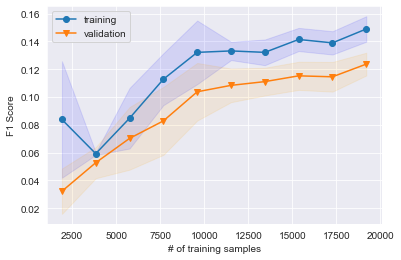

In [20]:
# Learning Curve Analysis

learning_curve_plotter(best_knn_clf, X_train, y_train)

In [27]:
metrics(X_train, y_train, X_test, y_test, best_knn_clf)

train / test metrics - tr_roc: 0.5347851850804085, tr_f1: 0.1496936578903792, test_roc: 0.5276528011820664, test_f1: 0.12754766600920447


(0.5347851850804085,
 0.1496936578903792,
 0.5276528011820664,
 0.12754766600920447)